#PROJECT OUTCOMES


*   How to read csv file without pandas using csv module in python itself
*   Using dictionary instead of pandas to deal with data.
*   Used datetime object module for analysis.
*   Learned how to make stackedbar chart



# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Further Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

In this project, I performed an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. I compared the system usage between three large cities: New York City, Chicago, and Washington, DC. I also checked if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

 What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the services

1)When are the bikes being used by the users more ,say for which hour are the users asking more for bikes.
2)Which route is the busiest and time consuming so that an alternate route can be designed.

<a id='wrangling'></a>
## Data Collection and Wrangling

I collected data from various websites resulting in different format datafiles:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)


In [0]:
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [0]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        
        ## Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader =csv.DictReader(f_in)
        
        ## Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip =next(trip_reader)
        
        
        ## Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. 

I generated new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. 
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


In [0]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    The Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    (The csv module reads in all of the data as strings, including numeric
    values.) 
    """
    if city ==  'NYC':
        duration=int(datum['tripduration']) / 60
    elif city ==  'Chicago':
        duration=int(datum['tripduration']) / 60
    else:
        duration=int(datum['Duration (ms)']) / 60000
    
    return duration

In [0]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    The NYC includes seconds, while Washington and Chicago do not.
    
    # Converted 'month' and 'hour' to Integers to remove leading Zero's.
    """
    if city == 'Washington':
        month = int(datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M").strftime('%m'))
        hour = int(datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M").strftime('%H'))
        day_of_week = datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M").strftime('%A')
    elif city == 'Chicago':
        month = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M").strftime('%m'))
        hour = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M").strftime('%H'))
        day_of_week = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M").strftime('%A')
    else :
        month = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S").strftime('%m'))
        hour = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S").strftime('%H'))
        day_of_week = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S").strftime('%A')
   
    
    return (month, hour, day_of_week)

In [0]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Here Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == 'Washington':
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
        
    elif city == 'Chicago' or city == 'NYC':
        user_type = datum['usertype']
    else:
        Print("invalid")
    
    return user_type

Creating a condensed data file for each city consisting only of the data fields indicated above. 

In [0]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # setting up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## setting up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            new_point = {}

            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'], new_point['hour'], new_point['day_of_week'] = time_of_trip(row, city)
            new_point['user_type'] = type_of_user(row, city)
            

            trip_writer.writerow(new_point)
            
            

In [0]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])



<a id='eda'></a>
## Exploratory Data Analysis


<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?


In [0]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)


In [0]:
data_file_Washington = './data/Washington-2016-Summary.csv'
data_file_Chicago = './data/Chicago-2016-Summary.csv'
data_file_NYC = './data/NYC-2016-Summary.csv'

m,n,o=number_of_trips(data_file_Washington)
p=m+n+o
m,n,o=number_of_trips(data_file_Chicago)
q=m+n+o
m,n,o=number_of_trips(data_file_NYC)
r=m+n+o
s=max(p,q,r)
if s==p:
    print("Washington has most no of trips")
elif s==q:
    print("Chicago has most no of trips")
else:
    print("NYC has most no of trips")
    

NYC has most no of trips


Maximum trips are for NYC

In [0]:
trips_data = {'Washington': {'Subscribers':0, 'Customers':0, 'Total':0},
             'Chicago': {'Subscribers':0, 'Customers':0, 'Total':0},
             'NYC': {'Subscribers':0, 'Customers':0, 'Total':0}}

trips_data['Washington'] = dict(zip(trips_data['Washington'].keys(), number_of_trips(data_file_Washington)))
trips_data['Chicago'] = dict(zip(trips_data['Chicago'].keys(), number_of_trips(data_file_Chicago)))
trips_data['NYC'] = dict(zip(trips_data['NYC'].keys(), number_of_trips(data_file_NYC)))

cities_dict = {1:'Washington' , 2:'Chicago' , 3:'NYC' }


proportion = {1: trips_data['Washington']['Subscribers']/trips_data['Washington']['Total'],
                  2: trips_data['Chicago']['Subscribers']/trips_data['Chicago']['Total'],
                  3: trips_data['NYC']['Subscribers']/trips_data['NYC']['Total']}

high_proportion = max(proportion, key=proportion.get)
print("\n city with the highest proportion of trips made by short-term customers?" + "is " + cities_dict[high_proportion])

data_file = './examples/BayArea-Y3-Summary.csv'



 city with the highest proportion of trips made by short-term customers?is NYC


In [0]:
tt_washington = p
tt_chicago = q
tt_nyc = r
def avg_trip_len(filename, city):
    
  
    with open(filename, 'r') as f_in:
        #  csv reader object
        reader = csv.DictReader(f_in)
        
    
        tt_len = 0
        
        # total trip length
        for row in reader:
            tt_len = tt_len + float(row['duration'])
        
        # total no of rides for each city
        if city == 'Washington':
            tt = tt_washington
        elif city == 'Chicago':
            tt = tt_chicago
        else:
            tt = tt_nyc
        
       
        return(int(tt_len/tt))
    

avg_trip_len_washington = avg_trip_len(data_file_Washington, 'Washington')
avg_trip_len_chicago = avg_trip_len(data_file_Chicago, 'Chicago')
avg_trip_len_nyc = avg_trip_len(data_file_NYC, 'NYC')



print("Avg Trip Len of Washington" + " = " + str(avg_trip_len_washington) + " Min")
print("Avg Trip Len of Chicago" + " = " + str(avg_trip_len_chicago) + " Min")
print("Avg Trip Len of NYC" + " = " + str(avg_trip_len_nyc) + " Min")

Avg Trip Len of Washington = 9 Min
Avg Trip Len of Chicago = 8 Min
Avg Trip Len of NYC = 7 Min


In [0]:
def long_trip_percent(filename, city):
    '''
        Get percent of trips that are longer than 30 minutes
    '''
    m = 30.0
    with open(filename, 'r') as f_in:
        # csv reader object
        reader = csv.DictReader(f_in)
        
        long_trip_count = 0
        
        #no of trips longer than 30 Minutes
        for row in reader:
            if float(row['duration']) > m:
                long_trip_count += 1
        
        #total no. of rides for each city
        if city == 'Washington':
            tt = tt_washington
        elif city == 'Chicago':
            tt = tt_chicago
        else:
            tt = tt_nyc
            
        # return % of trips that are longer than m=30 minutes
        return((round(long_trip_count/tt, 4) * 100))

#percentage of trips longer than 30 min for each city
long_trip_per_washington = long_trip_percent(data_file_Washington, 'Washington')
long_trip_per_chicago = long_trip_percent(data_file_Chicago, 'Chicago')
long_trip_per_nyc = long_trip_percent(data_file_NYC, 'NYC')

print("% trips Longer Than 30 Minutes in Washington" + " = " + str(long_trip_per_washington) + "%")
print("% trips Longer Than 30 Minutes in Chicago" + " = " + str(long_trip_per_chicago) + "%")
print("% trips Longer Than 30 Minutes in NYC" + " = " + str(long_trip_per_nyc) + "%")


% trips Longer Than 30 Minutes in Washington = 5.42%
% trips Longer Than 30 Minutes in Chicago = 4.17%
% trips Longer Than 30 Minutes in NYC = 3.65%




**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 4b)Avg Trip Len of Washington = 9 Min,
            Avg Trip Len of Chicago = 8 Min,
            Avg Trip Len of NYC = 7 Min,             Percentage Trips Longer Than 30 Minutes in Washington = 5.42%,
Percentage Trips Longer Than 30 Minutes in Chicago = 4.17%,
Percentage Trips Longer Than 30 Minutes in NYC = 3.65%

In [0]:
def rides_user_type(filename, city):
   
    with open(filename, 'r') as f_in:
        # csv reader object
        reader = csv.DictReader(f_in)
        
        trip_len_subs = 0
        trip_count_subs = 0
        
        trip_len_customers = 0
        trip_count_customers = 0
        
        # trip length and trip counts for Subscribers and
        # Customers in each city.
        for row in reader:
            if city == 'Washington':
                if row['user_type'] == 'Subscriber':
                    trip_len_subs += float(row['duration'])
                    trip_count_subs += 1
                else:
                    trip_len_customers += float(row['duration'])
                    trip_count_customers += 1
            elif city == 'Chicago':
                if row['user_type'] == 'Subscriber':
                    trip_len_subs += float(row['duration'])
                    trip_count_subs += 1
                else:
                    trip_len_customers += float(row['duration'])
                    trip_count_customers += 1
            else:
                if row['user_type'] == 'Subscriber':
                    trip_len_subs += float(row['duration'])
                    trip_count_subs += 1
                else:
                    trip_len_customers += float(row['duration'])
                    trip_count_customers += 1
              
       # return average trip duration for Subscribers and Customers
        avg_trip_len_subs = round((trip_len_subs/trip_count_subs), 2)
        avg_trip_len_customer = round((trip_len_customers/trip_count_customers), 2)
        return(avg_trip_len_subs, avg_trip_len_customer)

     
avg_trip_len_subs_washington, avg_trip_len_cust_washington = rides_user_type(data_file_Washington, 'Washington')
avg_trip_len_subs_chicago, avg_trip_len_cust_chicago = rides_user_type(data_file_Chicago, 'Chicago')
avg_trip_len_subs_nyc, avg_trip_len_cust_nyc = rides_user_type(data_file_NYC, 'NYC')

print("For Washington" + " => " + "Subscribers Avg Duration = " + str(avg_trip_len_subs_washington) + "; Customers Avg Duration = " + str (avg_trip_len_cust_washington))
print("For Chicago" + " => " + "Subscribers Avg Duration = " + str(avg_trip_len_subs_chicago) + "; Customers Avg Duration = " + str (avg_trip_len_cust_chicago))
print("For NYC" + " => " + "Subscribers Avg Duration = " + str(avg_trip_len_subs_nyc) + "; Customers Avg Duration = " + str (avg_trip_len_cust_nyc))

if (avg_trip_len_subs_washington > avg_trip_len_cust_washington):
    print ("In Washington Subscribers take longer rides than Customers")
else:
    print ("In Washington Customers take longer rides than Subscribers")
    
if (avg_trip_len_subs_chicago > avg_trip_len_cust_chicago):
    print ("In Chicago Subscribers take longer rides than Customers")
else:
    print ("In Chicago Customers take longer rides than Subscribers")
    
if (avg_trip_len_subs_nyc > avg_trip_len_cust_nyc):
    print ("In NYC Subscribers take longer rides than Customers")
else:
    print ("In NYC Customers take longer rides than Subscribers")

For Washington => Subscribers Avg Duration = 12.53; Customers Avg Duration = 41.68
For Chicago => Subscribers Avg Duration = 12.07; Customers Avg Duration = 30.98
For NYC => Subscribers Avg Duration = 13.68; Customers Avg Duration = 32.78
In Washington Customers take longer rides than Subscribers
In Chicago Customers take longer rides than Subscribers
In NYC Customers take longer rides than Subscribers


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: In Washington Customers take on an average more trips than Subscribers.

<a id='visualizations'></a>
### Visualizations

While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed.

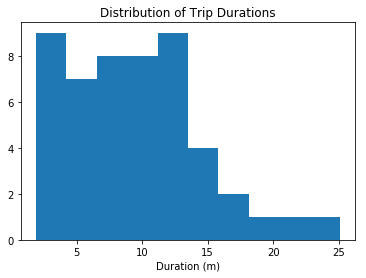

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. 

I will now use these functions to create a histogram of the trip times for the city selected in question 4c.

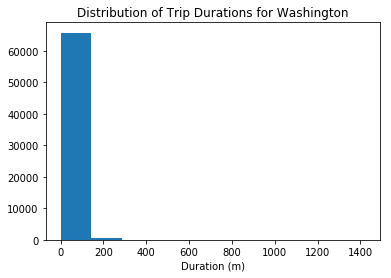

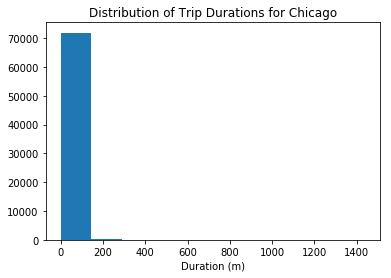

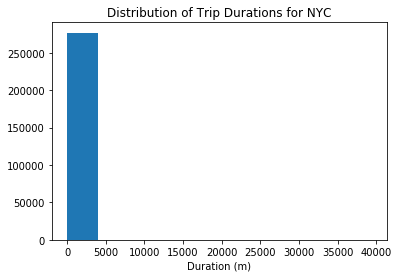

In [0]:
def ttimes(filename, city):

    with open(filename, 'r') as f_in:
        # csv reader object
        reader = csv.DictReader(f_in)
        
        ttimes_washington = []
        ttimes_chicago = []
        ttimes_nyc = []
        
        # trip time list for each city
        for row in reader:
            if city == 'Washington':
                ttimes_washington.append(float(row['duration']))
            elif city == 'Chicago':
                ttimes_chicago.append(float(row['duration']))
            else:
                ttimes_nyc.append(float(row['duration']))
              
        if city == 'Washington':
            return ttimes_washington
        elif city == 'Chicago':
            return ttimes_chicago
        else:
            return ttimes_nyc

ttimes_washington = ttimes(data_file_Washington, 'Washington')
ttimes_chicago = ttimes(data_file_Chicago, 'Chicago')
ttimes_nyc = ttimes(data_file_NYC, 'NYC')

# Plot the histogram of trip durations for each city
plt.hist(ttimes_washington)
plt.title('Distribution of Trip Durations for Washington')
plt.xlabel('Duration (m)')
plt.show()

plt.hist(ttimes_chicago)
plt.title('Distribution of Trip Durations for Chicago')
plt.xlabel('Duration (m)')
plt.show()

plt.hist(ttimes_nyc)
plt.title('Distribution of Trip Durations for NYC')
plt.xlabel('Duration (m)')
plt.show()

In [0]:
def ttimes_subs_cust(filename, city):
    '''
        Get the trip times for each of the cities.
    '''
    with open(filename, 'r') as f_in:
        # csv reader object
        reader = csv.DictReader(f_in)
        
        ttimes_subs_washington = []
        ttimes_cust_washington = []
        
        
        #trip times for Subscribers and Customers for each city
        for row in reader:
            if city == 'Washington':
                if row['user_type'] == 'Subscriber':
                    ttimes_subs_washington.append(float(row['duration']))
                else:
                    ttimes_cust_washington.append(float(row['duration']))
              
        # return trip duration of Subscribers and Customers for each city
        if city == 'Washington':
            return (ttimes_subs_washington, ttimes_cust_washington)

#trip duration of Subscribers and Customers for Washington
ttimes_subs_washington, ttimes_cust_washington = ttimes_subs_cust(data_file_Washington, 'Washington')


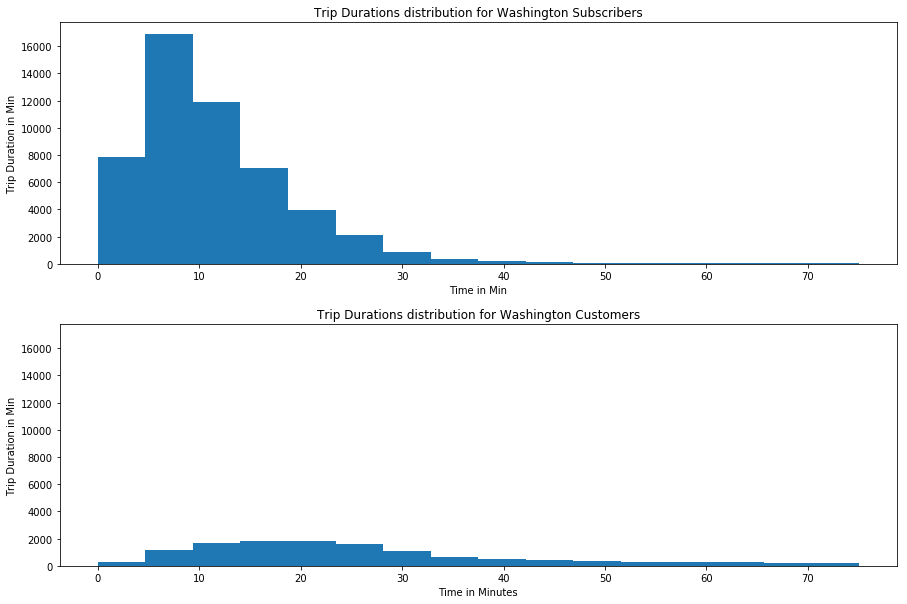

In [0]:
f, (plt1, plt2) = plt.subplots(2, sharey=True)
plt1.hist(ttimes_subs_washington, range = (0, 75), bins = 16)
plt1.set_title('Trip Durations distribution for Washington Subscribers')
plt1.set_xlabel('Time in Min')
plt1.set_ylabel("Trip Duration in Min")

plt2.hist(ttimes_cust_washington, range = (0, 75), bins = 16)
plt2.set_title('Trip Durations distribution for Washington Customers')
plt2.set_xlabel('Time in Minutes')
plt2.set_ylabel("Trip Duration in Min")

f.subplots_adjust(hspace=0.25)
f.set_figheight(10)
f.set_figwidth(15)
plt.show()


In [0]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##



Above plots show high presence of outliers.

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: Replace this text with your response!

## answer Question 5. ##
5) The peak is at the Average Trip Duration, Most of the distributons are positively skewed




<a id='eda_continued'></a>
## Further Analysis

So far,I have performed an initial exploration into the data available. I compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, I had investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. 

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?


Ridership by Month for Washington => {1: 31140.223600000107, 2: 36565.14208333328, 3: 110075.18485000047, 4: 109825.68944999986, 5: 116117.24186666649, 6: 153950.80770000006, 7: 168083.57223333383, 8: 134724.9150000009, 9: 131644.45458333314, 10: 125110.32186666655, 11: 89993.60525000017, 12: 48510.61320000002}


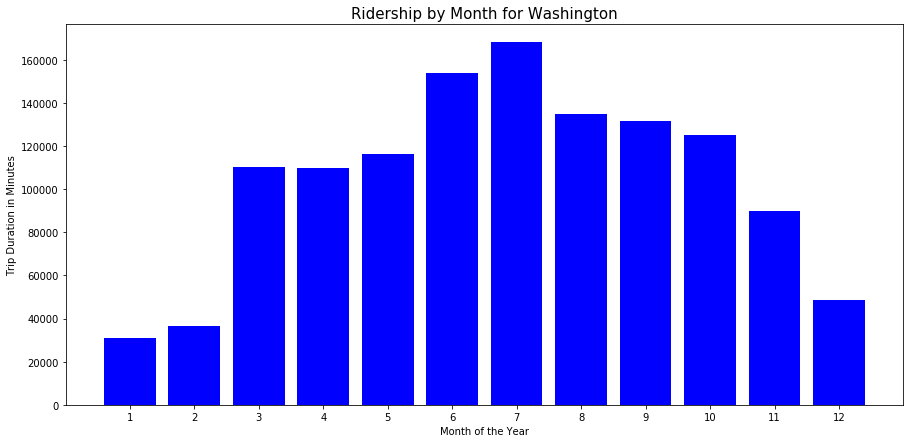

In [0]:
# How does ridership differ by month or season? Which month / season has the highest ridership?
def duration_by_month(filename):
    with open(filename, 'r') as f_in:
        #csv reader object
        reader = csv.DictReader(f_in)
        
        duration_month = {1:0, 2:0, 3:0, 4: 0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
        
        #trip duration by month
        for row in reader:
            duration_month[int(row['month'])] += float(row['duration'])
                
        return (duration_month)


duration_by_month_Washington = duration_by_month(data_file_Washington)
print("Ridership by Month for Washington => "+ str(duration_by_month_Washington))

no_of_months = range(12)
plt.figure(figsize=(15,7))
plt.bar(no_of_months, duration_by_month_Washington.values(), color='b', align='center')
plt.xticks(no_of_months, duration_by_month_Washington.keys())
plt.xlabel("Month of the Year")
plt.ylabel("Trip Duration in Minutes")
plt.title("Ridership by Month for Washington", fontsize=15)
plt.show()

Subscriber_Trips_by_Month - {1: 2212, 2: 2571, 3: 4383, 4: 4410, 5: 4520, 6: 5613, 7: 5155, 8: 5392, 9: 5204, 10: 5232, 11: 4139, 12: 2922}
Customer_Trips_by_Month - {1: 222, 2: 283, 3: 1188, 4: 1192, 5: 1248, 6: 1707, 7: 2186, 8: 1806, 9: 1674, 10: 1560, 11: 1075, 12: 432}


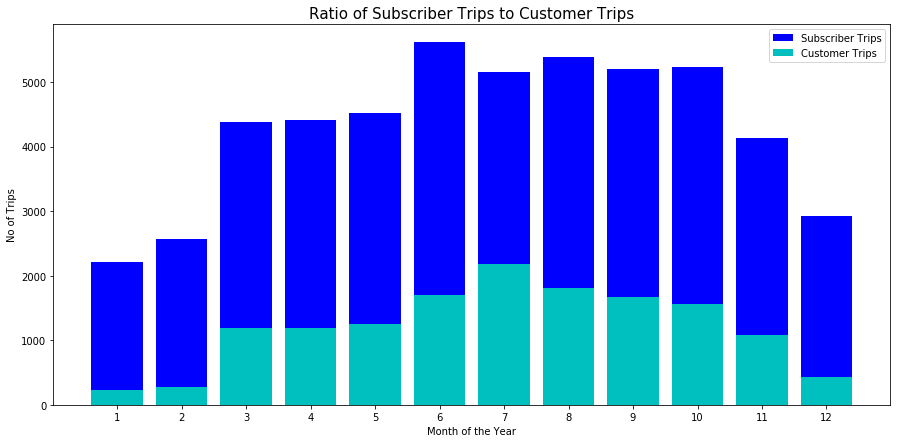

Ratio of Subscriber to Customer Trips => {1: 9.96, 2: 9.08, 3: 3.69, 4: 3.7, 5: 3.62, 6: 3.29, 7: 2.36, 8: 2.99, 9: 3.11, 10: 3.35, 11: 3.85, 12: 6.76}


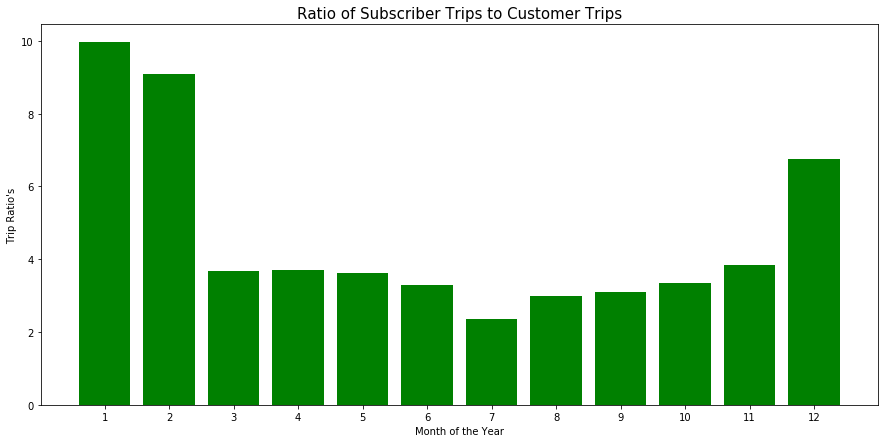

In [0]:
# Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
def trips_by_month(filename, user_type):
    with open(filename, 'r') as f_in:
        #csv reader object
        reader = csv.DictReader(f_in)

        trips_month = {1:0, 2:0, 3:0, 4: 0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
        
        for row in reader:
            if user_type == 'Subscriber' and row['user_type'] == 'Subscriber':
                trips_month[int(row['month'])] += 1
            elif user_type == 'Customer' and row['user_type'] == 'Customer':
                trips_month[int(row['month'])] += 1
                
        return (trips_month)


trips_month_subs = trips_by_month(data_file_Washington, 'Subscriber')
print("Subscriber_Trips_by_Month - " + str(trips_month_subs))

trips_month_cust = trips_by_month(data_file_Washington, 'Customer')
print("Customer_Trips_by_Month - " + str(trips_month_cust))

no_of_months = range(12)
plt.figure(figsize=(15,7))
plt.bar(no_of_months, trips_month_subs.values(), color='b', align='center')
plt.bar(no_of_months, trips_month_cust.values(), color='c', align='center')
plt.legend(('Subscriber Trips','Customer Trips'))
plt.xticks(no_of_months, trips_month_subs.keys())
plt.xlabel("Month of the Year")
plt.ylabel("No of Trips")
plt.title("Ratio of Subscriber Trips to Customer Trips", fontsize=15)
plt.show()

ratio_of_trips = {mon: round(trips_month_subs[mon]/trips_month_cust[mon],2) for mon in trips_month_subs}
print("Ratio of Subscriber to Customer Trips => " + str(ratio_of_trips))

no_of_months = range(12)
plt.figure(figsize=(15,7))
plt.bar(no_of_months, ratio_of_trips.values(), color='g', align='center')
plt.xticks(no_of_months, ratio_of_trips.keys())
plt.xlabel('Month of the Year')
plt.ylabel("Trip Ratio's")
plt.title("Ratio of Subscriber Trips to Customer Trips", fontsize=15)
plt.show()

In [0]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##

<a id='conclusions'></a>
## Conclusions
**Further developments**
  As another example, weather has potential to have a large impact on daily ridership. 

*   Drawing conclusions about the data by performing a statistical test or fitting the data to a model for making predictions.
*   Where are the most commonly used docks? 
*   What are the most common routes?
*   How much is ridership impacted when there is rain or snow? 
*   How the subscribers or customers affected more by changes in weather?


In [0]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0